## Predicting Diamond Prices using Machine Learning: A Comprehensive Analysis

Diamonds, often referred to as "a girl's best friend," have always been a symbol of luxury and elegance. Their prices are influenced by various factors like cut, carat, clarity, and color. In this blog, we will explore the fascinating world of diamond prices by employing machine learning algorithms. By analyzing a comprehensive dataset of diamonds, we will build and evaluate several regression models to predict diamond prices accurately.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

data = pd.read_csv("diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Importing Data and Preprocessing
We start by importing the required libraries, including NumPy, Pandas, Seaborn, Matplotlib, and various modules from Scikit-learn. We also load the dataset "diamonds.csv" into a Pandas DataFrame. After that, we drop any dimensionless diamonds from the dataset, as well as remove any outliers in the "depth," "table," "x," "y," and "z" columns.

In [2]:
#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

### Exploratory Data Analysis (EDA)
To better understand the relationships between different features and the target variable ("price"), we utilize Seaborn's pairplot to create a visually appealing matrix of scatter plots. Each plot is color-coded by the "cut" feature, showing how the diamond cut impacts the relationship between the other features and price.

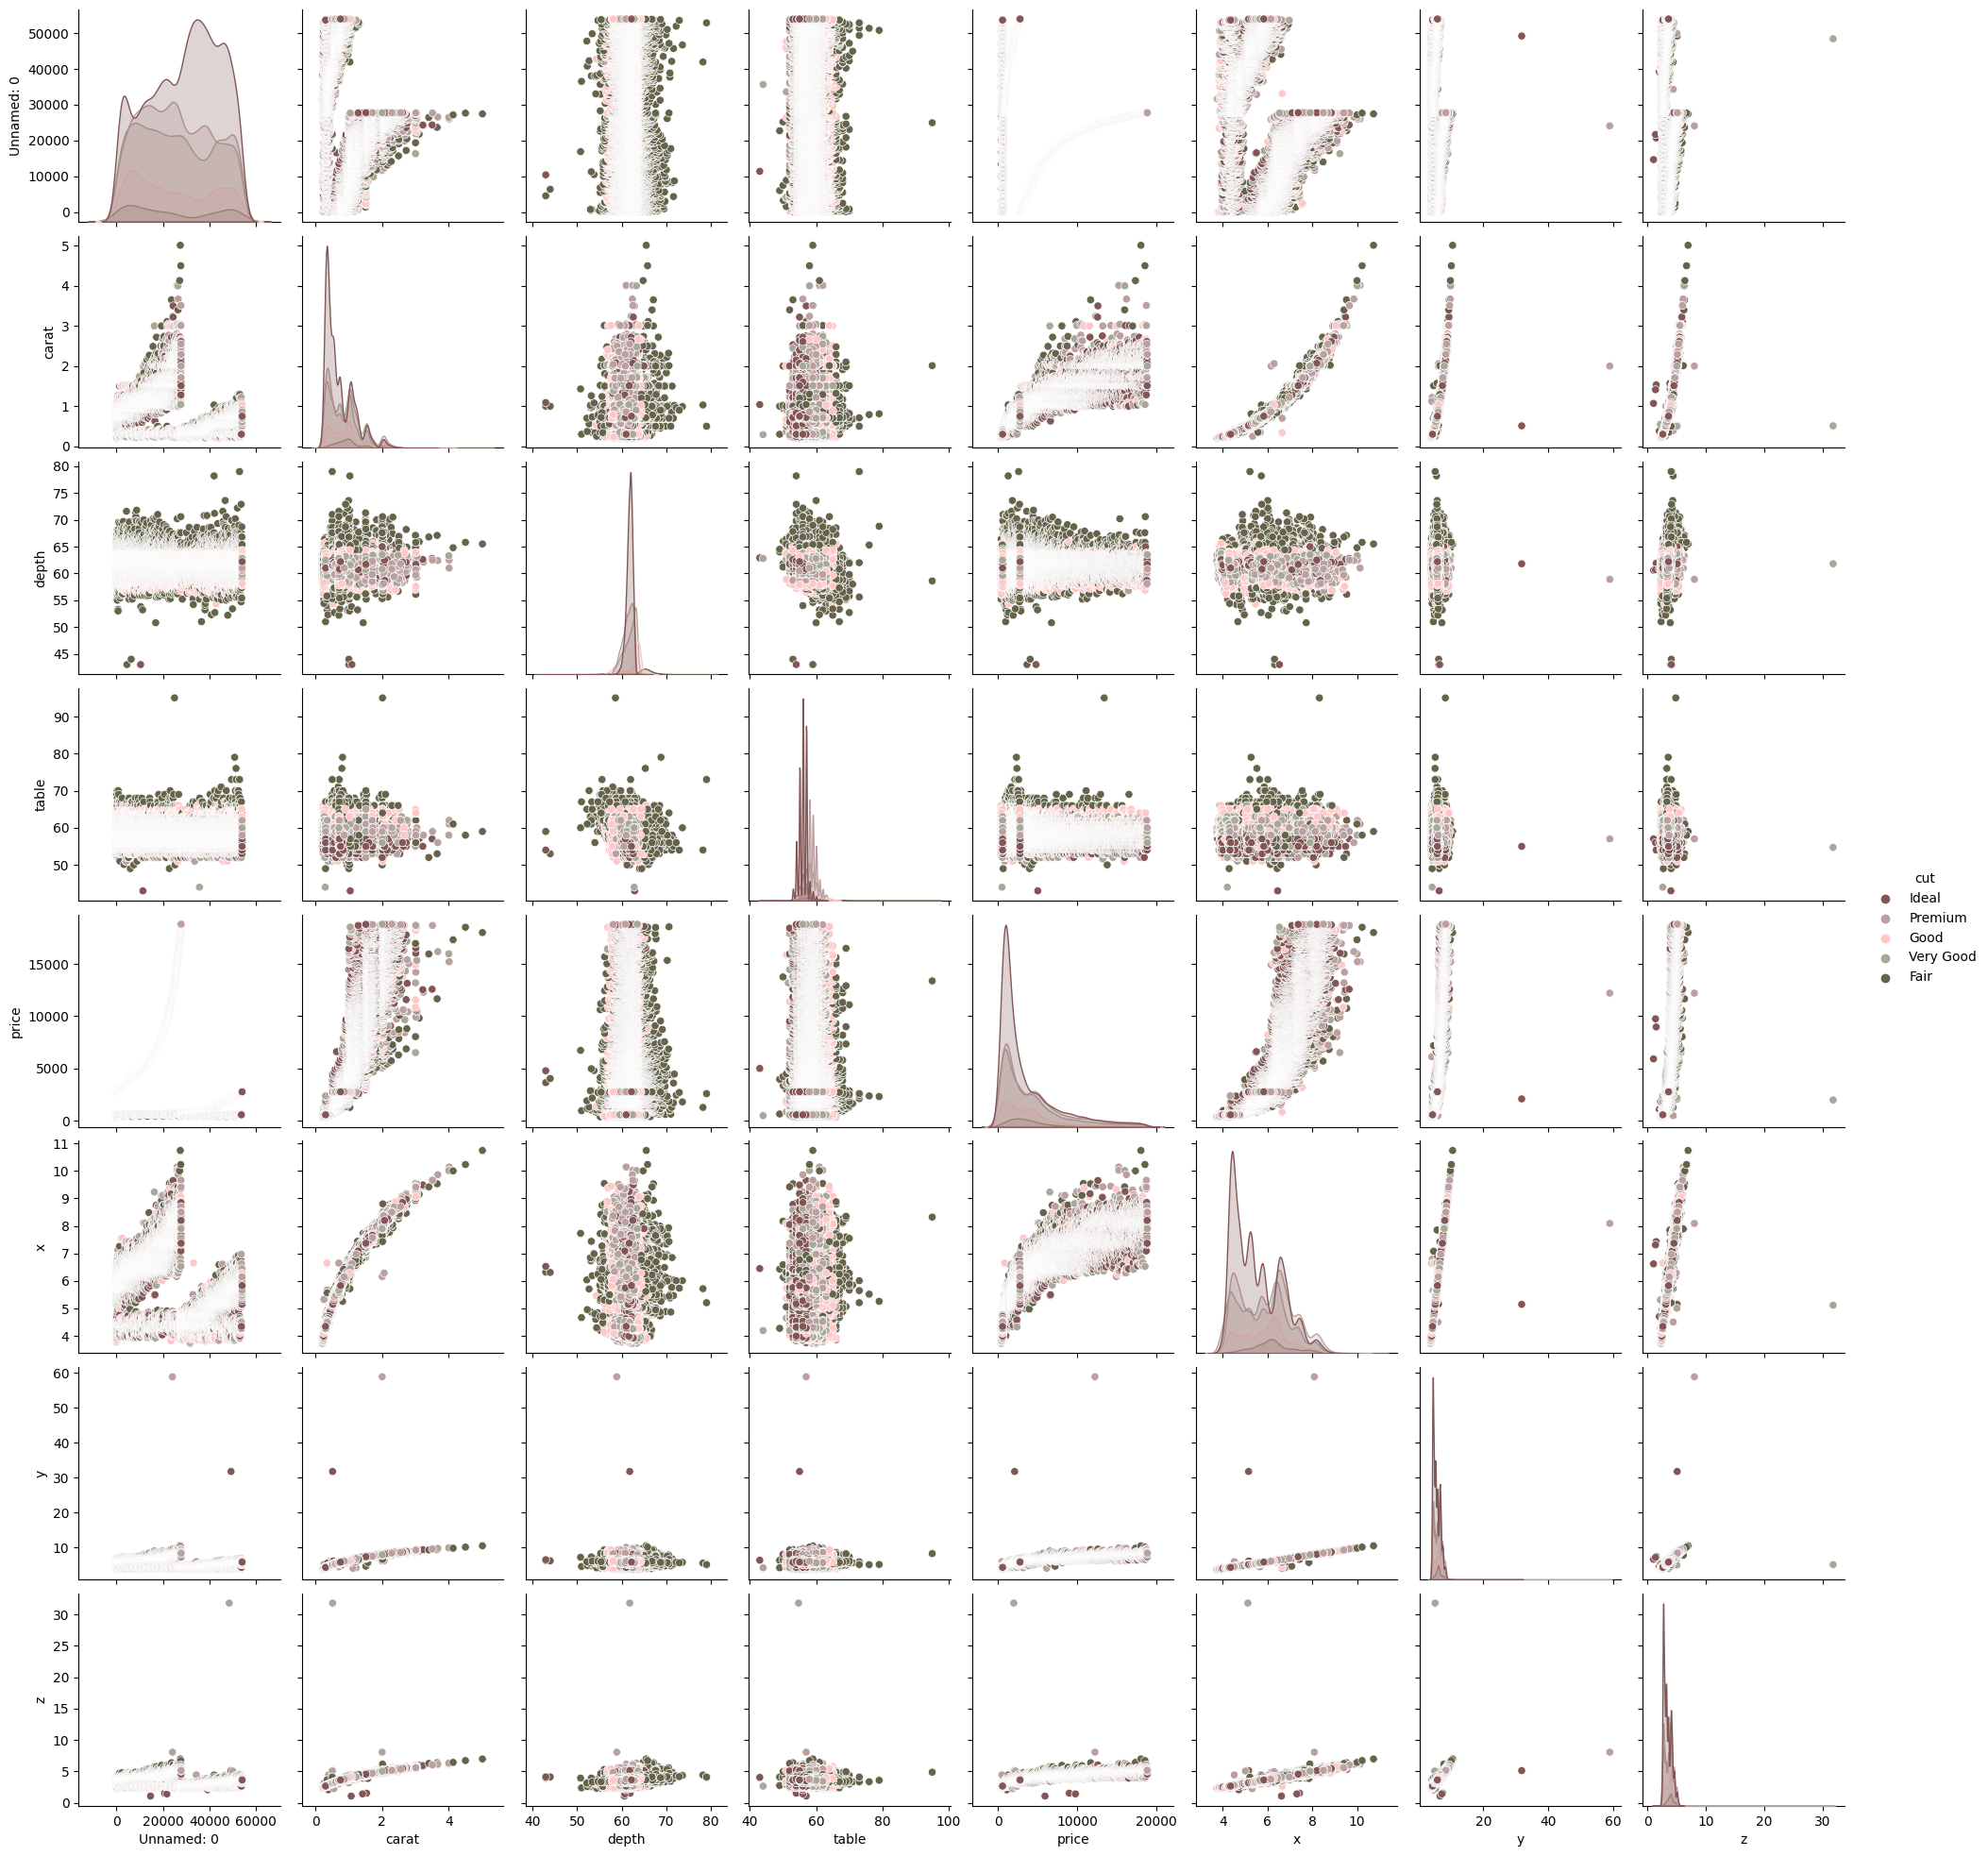

In [3]:
shade = ["#835656", "#baa0a0", "#ffc7c8", "#a9a799", "#65634a"] # shades for hue
ax = sns.pairplot(data, hue= "cut",palette=shade)

In [4]:
# Dropping the outliers. 
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]

In [5]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


### Label Encoding Categorical Data
As machine learning models require numeric input, we use Label Encoder from Scikit-learn to convert categorical variables in the dataset into numerical form. This step ensures that the models can handle the data effectively.

In [6]:
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])

### Correlation Matrix
To gain insights into the correlation between the features, we construct a correlation matrix using the encoded dataset and visualize it as a heatmap. This helps us identify which features have a stronger impact on the target variable.

<AxesSubplot: >

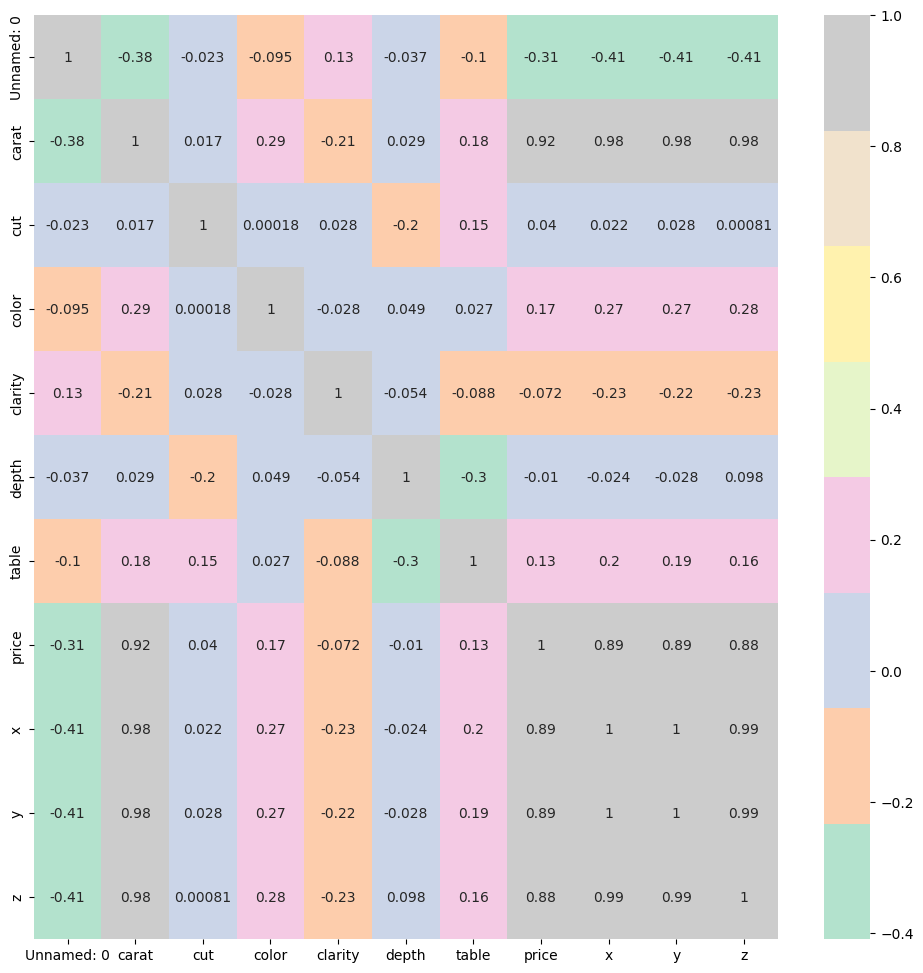

In [7]:
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap="Pastel2",annot=True)

## Models Training

In [8]:
names = []
mae = []
r2 = []
mse = []
models = []

# Splitting the data into train and test sets
X = label_data.drop(["price"],axis=1)
y = label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Selection and Evaluation
For the diamond price prediction task, we consider four popular regression models: Linear Regression, Random Forest Regressor, Decision Tree Regressor, and K-Nearest Neighbors Regressor. After splitting the data into training and testing sets, we proceed to fit each model to the training data.

In [9]:
# Evaluate the models
lr = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
kn = KNeighborsRegressor()

# Fit the models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)
kn.fit(X_train, y_train)

# Make predictions
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = dt.predict(X_test)
y_pred4 = kn.predict(X_test)

In [10]:
models.append(('LR', y_pred1))
models.append(('RF', y_pred2))
models.append(('DT', y_pred3))
models.append(('KN', y_pred4))

### Performance Metrics
To evaluate the model performances, we use three commonly used metrics: Mean Squared Error (MSE), R-squared (R2) Score, and Mean Absolute Error (MAE). These metrics allow us to gauge how well each model predicts diamond prices and compare their effectiveness.

In [11]:
for name, model in models:
    mse.append(np.sqrt(mean_squared_error(y_test, model)))
    r2.append(np.sqrt(r2_score(y_test, model)))
    mae.append(np.sqrt(mean_absolute_error(y_test, model)))
    names.append(name)

### Results and Conclusion
Upon evaluating the models, we present the results in a visually appealing bar plot. The plot showcases the MSE, R2 Score, and MAE for each model. The performance comparison helps us identify which model provides the most accurate predictions for diamond prices.

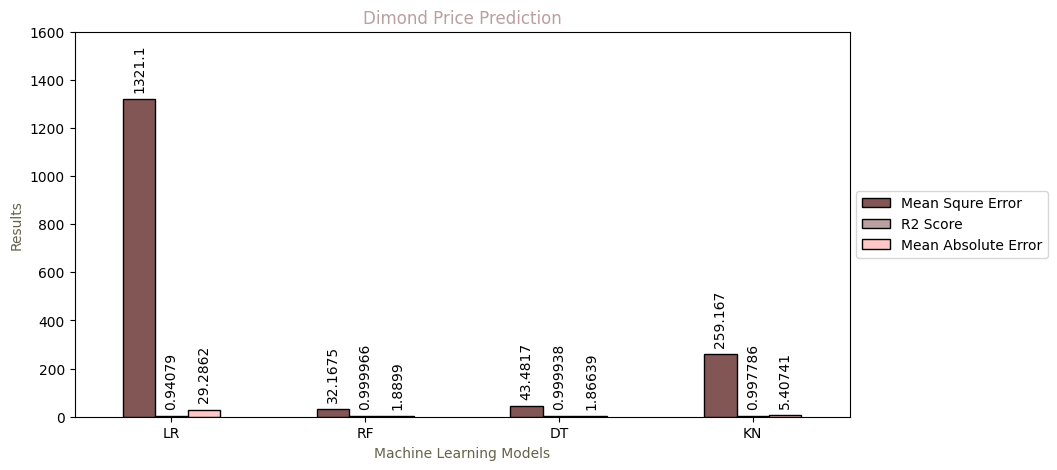

In [25]:
plotdata = pd.DataFrame({'Mean Squre Error': mse, 'R2 Score': r2, 'Mean Absolute Error': mae}, index=names)
ax = plotdata.plot(kind="bar",figsize=(10, 5), rot=0, yticks = range(0,1800,200), color = shade, edgecolor = 'black')
plt.title("Dimond Price Prediction", color='#baa0a0')
plt.xlabel("Machine Learning Models", color='#65634a')
plt.ylabel("Results", color='#65634a')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for container in ax.containers:
    ax.bar_label(container, rotation=90, padding = 5)

In conclusion, this code provides a detailed analysis of predicting diamond prices using machine learning. By employing a variety of regression models and evaluating their performance, we gain valuable insights into the factors influencing diamond prices. Understanding these correlations can be invaluable for buyers, sellers, and diamond enthusiasts alike. As the world of machine learning continues to evolve, the accuracy of diamond price predictions is only expected to improve, opening new possibilities in the diamond industry.

With machine learning's increasing applications across various domains, it's fascinating to witness how technology continues to revolutionize industries, even those as timeless and cherished as diamonds.